## Part 6: Visualization

The processed diffuse scattering data from Part 5 is stored as a table of values covering the asymmetric unit of reciprocal space. In order to visualize the data, it is necessary to convert from a table to an array and symmetry-expand the data. The function _mdx2.map_ can be used for generating slices and volumes. First, generate a slice as follows:

In [1]:
!mdx2.map geometry.nxs merged.nxs --limits -50 50 -50 50 0 0 --outfile slice.nxs

Reading hkl_table from merged.nxs
  importing as HKLTable from mdx2.data
Reading crystal from geometry.nxs
  importing as Crystal from mdx2.geometry
Reading symmetry from geometry.nxs
  importing as Symmetry from mdx2.geometry
map region:
  h from -50.0 to 50.0 (401 grid points)
  k from -50.0 to 50.0 (401 grid points)
  l from 0.0 to 0.0 (1 grid points)
generating Miller index array
mapping Miller indices to asymmetric unit
looking up intensity in data table
preparing output array
Exporting <class 'mdx2.geometry.GridData'> to nexus object
  writing intensity to slice.nxs
done!


The `limits` argument defines the boundaries of the slice in fractional (Miller index) units. In this case, the slice is a central section (_hk0_).

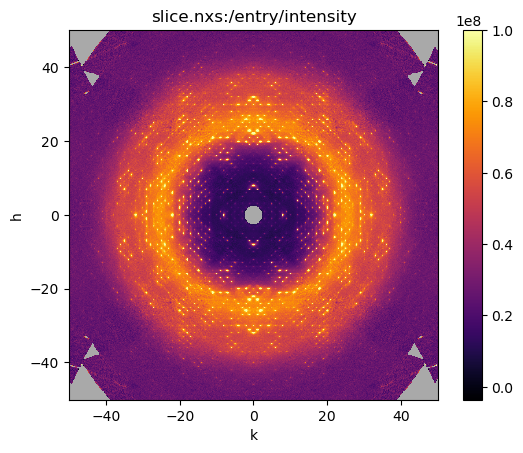

In [2]:
from nexusformat.nexus import nxload

intensity = nxload('slice.nxs','r')['/entry/intensity']
intensity[:,:,0].plot(cmap='inferno',aspect='equal',vmax=1E8,vmin=0)

A similar command can be used to generate reciprocal space volumes:

In [3]:
!mdx2.map geometry.nxs merged.nxs --limits -0 50 0 50 0 50 --outfile map.nxs

Reading hkl_table from merged.nxs
  importing as HKLTable from mdx2.data
Reading crystal from geometry.nxs
  importing as Crystal from mdx2.geometry
Reading symmetry from geometry.nxs
  importing as Symmetry from mdx2.geometry
map region:
  h from 0.0 to 50.0 (201 grid points)
  k from 0.0 to 50.0 (201 grid points)
  l from 0.0 to 50.0 (201 grid points)
generating Miller index array
mapping Miller indices to asymmetric unit
looking up intensity in data table
preparing output array
Exporting <class 'mdx2.geometry.GridData'> to nexus object
  writing intensity to map.nxs
done!


To conserve computing resources, we have restricted the map to the positive octant of reciprocal space ($h \geq 0$, $k \geq 0$, $l \geq 0$), which is the same as the other seven by symmetry. 

Open `map.nxs` using _NeXpy_ and double-click `intensity` in the file tree to plot a map section. Unselect "autoscale" in the z tab so that intensity scale is fixed, and adjust the sliders in the signal tab to make the background scattering variations clear as shown above. Scroll through z-slices. 